# Cardiovascular Disease Risk

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime
import sys
import os

In [13]:
csvPath = "csv/cardio_train.csv"
# df has ; instead of , as separator
df = pd.read_csv(csvPath, sep=';')

In [14]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [16]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Type de données
Données quantitatives discrètes:
- Age: âge en jours
- Gender: 1: femme, 2: homme
- Height: taille en cm
- Ap_hi: pression artérielle systolique
- Ap_lo: pression artérielle diastolique
- Cholesterol: 1: normal, 2: au-dessus de la normal, 3: bien au-dessus de la normal
- Glucose: 1: normal, 2: au-dessus de la normal, 3: bien au-dessus de la normal
- Smoke: 0: non-fumeur, 1: fumeur
- Alco: 0: ne boit pas, 1: boit
- Active: 0: pas d'activité physique, 1: activité physique
- Cardio: 0: pas de maladie cardiovasculaire, 1: maladie cardiovasculaire

Données quantitatives continues:
- Weight: poids en kg



In [17]:
age = df['age']
# age is in number of days, convert to years with 2 decimal places
age = age / 365.25

In [18]:
df['age_in_year'] = age
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.302850
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.754967
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.563313
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.361396
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.943874
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.390144
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656


## Régression logistique

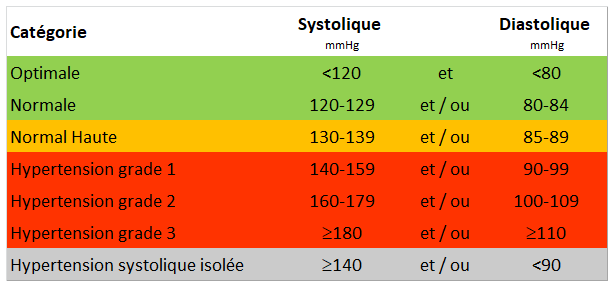

## Néttoyage des données

In [20]:
# systolique max = 200
# systolique min = 100
# diastolique max = 120
# diastolique min = 70

ap_hi_max = 200
ap_hi_min = 100
ap_lo_max = 120
ap_lo_min = 70

# remove outliers
df = df[(df['ap_hi'] <= ap_hi_max) & (df['ap_hi'] >= ap_hi_min)]
df = df[(df['ap_lo'] <= ap_lo_max) & (df['ap_lo'] >= ap_lo_min)]
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_year
count,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000,65109.000000
mean,49965.464575,19506.962893,1.353776,164.473928,74.442835,127.486999,82.160976,1.369396,1.227879,0.088267,0.053526,0.803499,0.505752,53.407154
std,28851.727994,2455.353818,0.478144,8.149660,14.251046,15.380692,8.045393,0.683770,0.574728,0.283686,0.225081,0.397355,0.499971,6.722392
min,0.000000,10859.000000,1.000000,55.000000,11.000000,100.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.730322
25%,24952.000000,17771.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.654346
50%,50004.000000,19724.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.001369
75%,74869.000000,21355.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.466804
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,197.000000,119.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656


In [ ]:
# height 